In [3]:
import networkx as nx
import math
from aux_functions import *
from generation import generation as gen
import matplotlib.pyplot as plt
import random
import time
import math

quota = 500

dataset = load_dataset('problems/symmetrics/att48.tsp')
n = len(dataset)

G = nx.complete_graph(n) 

{0: Text(6734.0, 1453.0, '0'),
 1: Text(2233.0, 10.0, '11'),
 2: Text(5530.0, 1424.0, '12'),
 3: Text(401.0, 841.0, '13'),
 4: Text(3082.0, 1644.0, '14'),
 5: Text(7608.0, 4458.0, '15'),
 6: Text(7573.0, 3716.0, '16'),
 7: Text(7265.0, 1268.0, '17'),
 8: Text(6898.0, 1885.0, '18'),
 9: Text(1112.0, 2049.0, '19'),
 10: Text(5468.0, 2606.0, '20'),
 11: Text(5989.0, 2873.0, '21'),
 12: Text(4706.0, 2674.0, '22'),
 13: Text(4612.0, 2035.0, '23'),
 14: Text(6347.0, 2683.0, '24'),
 15: Text(6107.0, 669.0, '25'),
 16: Text(7611.0, 5184.0, '26'),
 17: Text(7462.0, 3590.0, '27'),
 18: Text(7732.0, 4723.0, '28'),
 19: Text(5900.0, 3561.0, '29'),
 20: Text(4483.0, 3369.0, '30'),
 21: Text(6101.0, 1110.0, '31'),
 22: Text(5199.0, 2182.0, '32'),
 23: Text(1633.0, 2809.0, '33'),
 24: Text(4307.0, 2322.0, '34'),
 25: Text(675.0, 1006.0, '35'),
 26: Text(7555.0, 4819.0, '36'),
 27: Text(7541.0, 3981.0, '37'),
 28: Text(3177.0, 756.0, '38'),
 29: Text(7352.0, 4506.0, '39'),
 30: Text(7545.0, 2801.0, '4

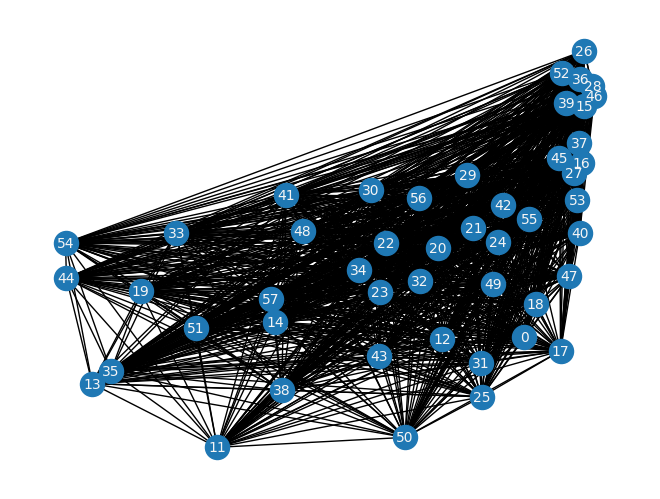

In [4]:


my_pos = { i : ( dataset[i].x, dataset[i].y ) for i in G.nodes }

bonus_label = {}

for i in G.nodes:
    if(i == 0):
        G.nodes[i]['bonus'] = 0
        bonus_label[0] = G.nodes[i]['bonus']
        G.nodes[i]['penalty'] = math.inf
    else:
        bonus = dataset[i].id + 10
        bonus_label[i] = bonus
        G.nodes[i]['bonus'] = bonus
        G.nodes[i]['penalty'] =  500
    G.nodes[i]['id'] = dataset[i].id

for i,j in G.edges:
    (x1,y1) = my_pos[i]
    (x2,y2) = my_pos[j]
    G.edges[i,j]['length'] = eucl_dist(x1,y1,x2,y2)


nx.draw(G, pos=my_pos)
nx.draw_networkx_labels(G, my_pos, labels=bonus_label, font_size=10, font_color="whitesmoke")

# plt.figure()
# route_edges = [ (route[i-1]['id'],route[i]['id']) for i in range(len(route)) ]


# nx.draw(G.edge_subgraph(route_edges), pos=my_pos, with_labels=True)


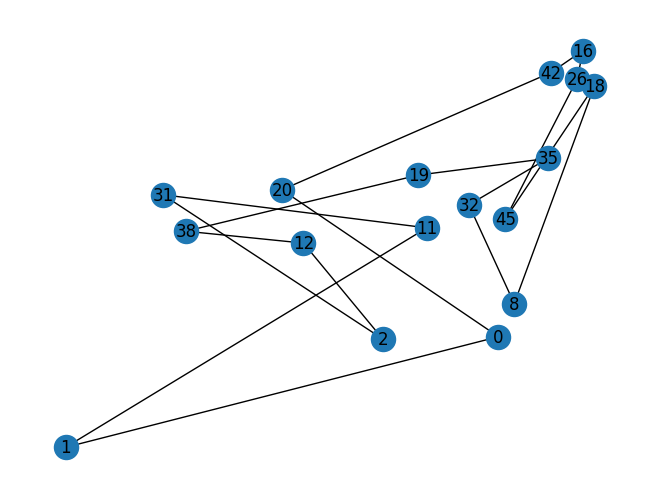

In [5]:
from generation import generation as gen

# ADD_step
route = gen.grasp_construction(G, quota, 0.4)
plt.figure()
route_edges = [ (route[i-1]['id'],route[i]['id']) for i in range(len(route)) ]
nx.draw(G.edge_subgraph(route_edges), pos=my_pos, with_labels=True)

In [6]:
# from local_search import local_search as ls

# # lin-kernighan
# route_lin = ls.lin_kernighan(route, G)

# route = [*route_lin[:len(route)]]
# plt.figure()
# route_edges = [ (route[i-1]['id'],route[i]['id']) for i in range(len(route)) ]
# nx.draw(G.edge_subgraph(route_edges), pos=my_pos, with_labels=True)

In [7]:
# 2-opt swap
from local_search import local_search as ls

route = ls.swap_2_opt(route, G, my_pos)

bonus_label = bonus_labels(route)

In [ ]:
import networkx as nx
import math
from aux_functions import *
from generation import generation as gen
import matplotlib.pyplot as plt
import random
import time
import math

quota = 500

dataset = load_dataset('problems/symmetrics/att48.tsp')
n = len(dataset)

G = nx.complete_graph(n) 

my_pos = { i : ( dataset[i].x, dataset[i].y ) for i in G.nodes }

bonus_label = {}

for i in G.nodes:
    if(i == 0):
        G.nodes[i]['bonus'] = 0
        bonus_label[0] = G.nodes[i]['bonus']
        G.nodes[i]['penalty'] = math.inf
    else:
        bonus = dataset[i].id + 10
        bonus_label[i] = bonus
        G.nodes[i]['bonus'] = bonus
        G.nodes[i]['penalty'] =  500
    G.nodes[i]['id'] = dataset[i].id

for i,j in G.edges:
    (x1,y1) = my_pos[i]
    (x2,y2) = my_pos[j]
    G.edges[i,j]['length'] = eucl_dist(x1,y1,x2,y2)

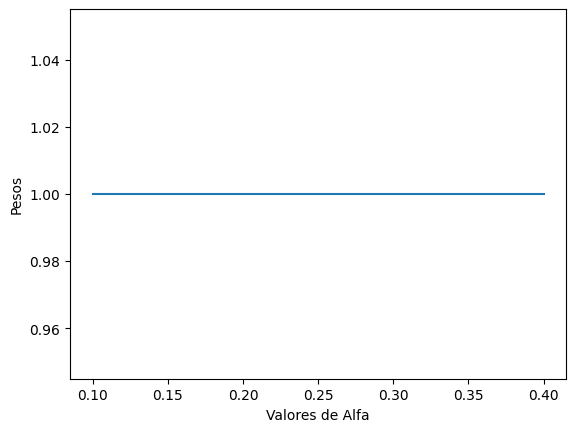

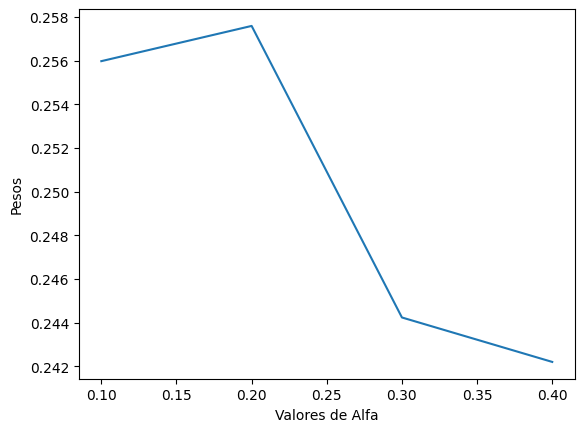

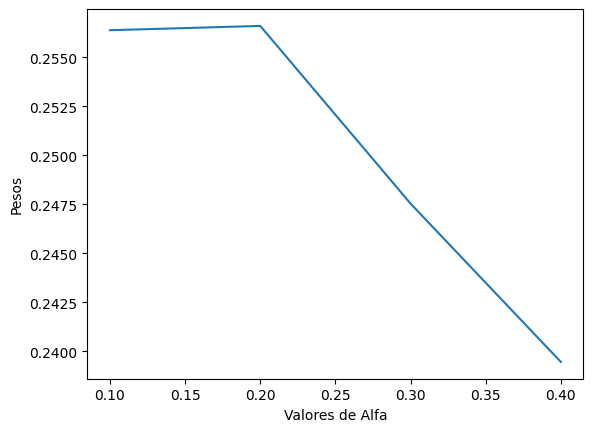

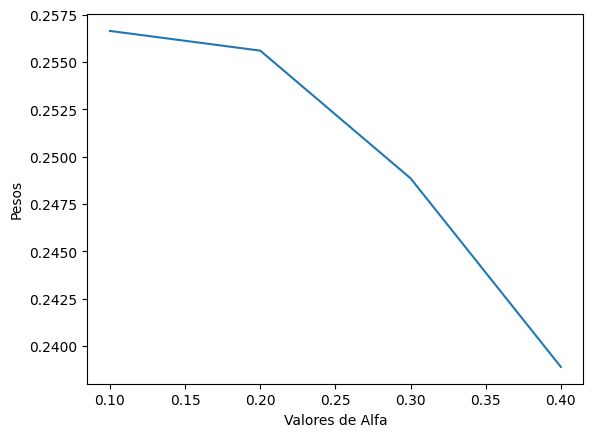

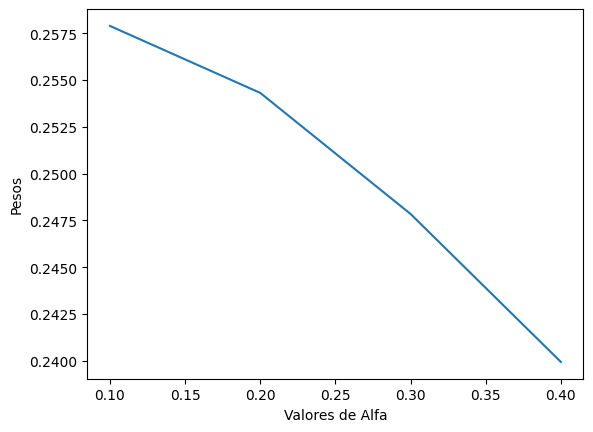

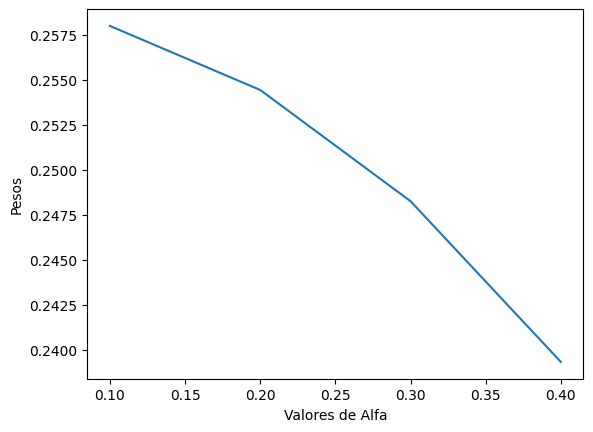

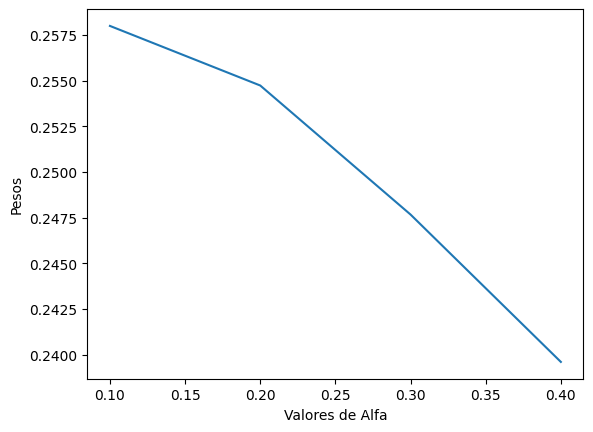

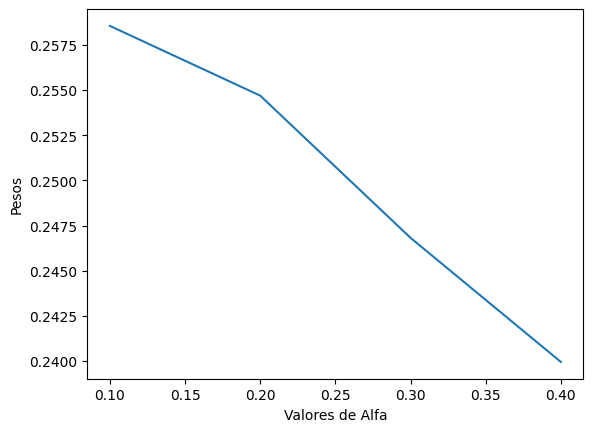

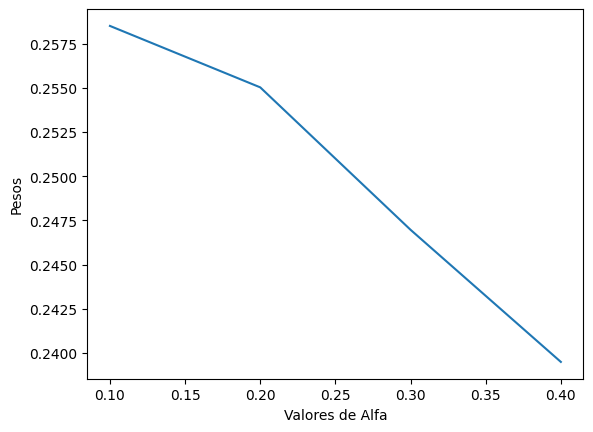

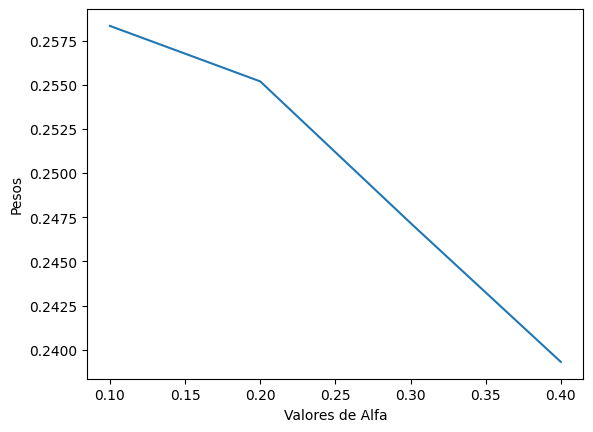

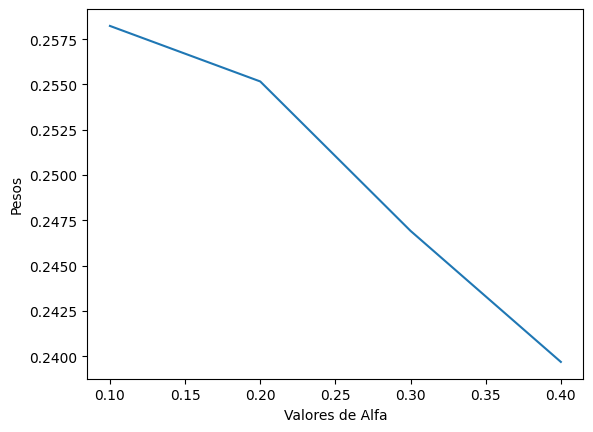

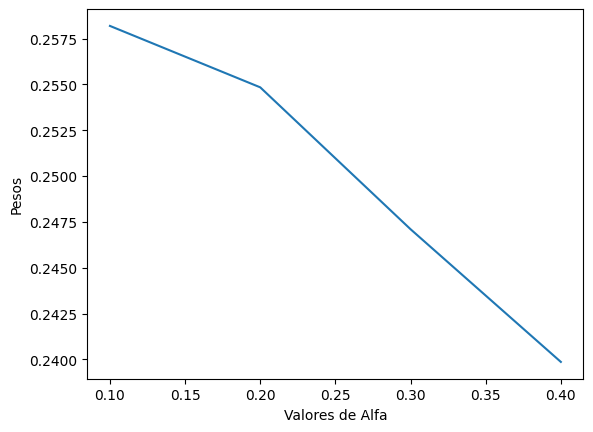

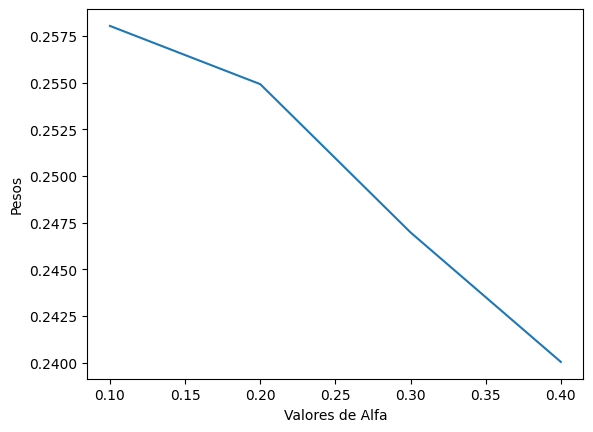

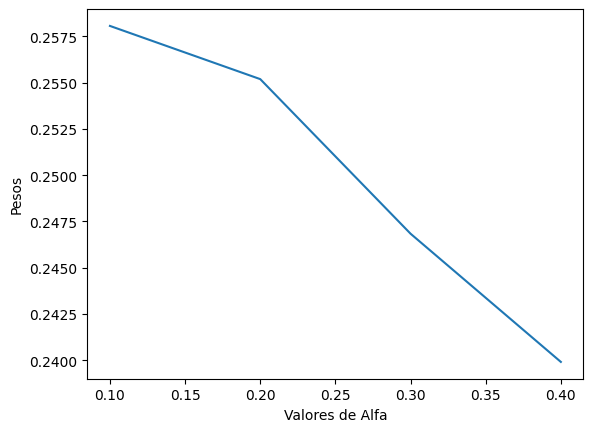

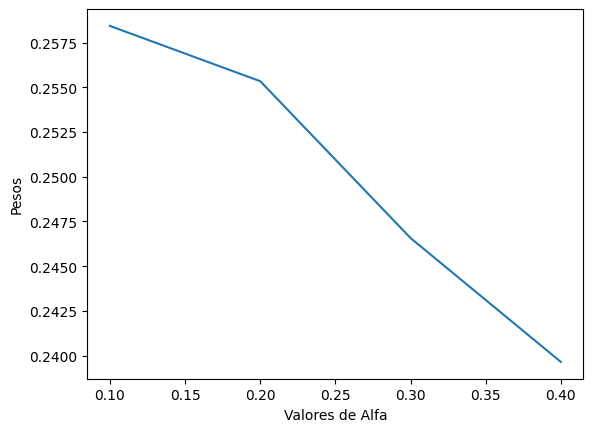

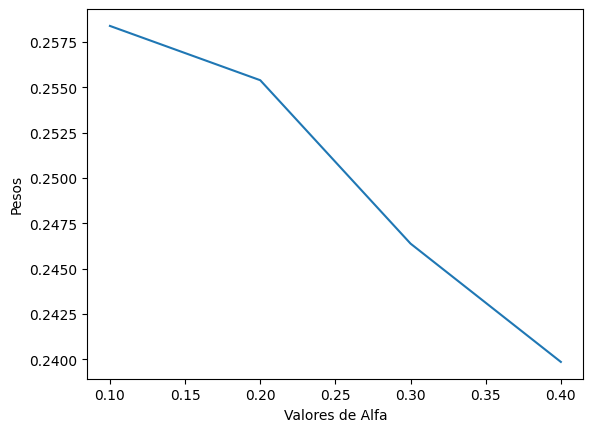

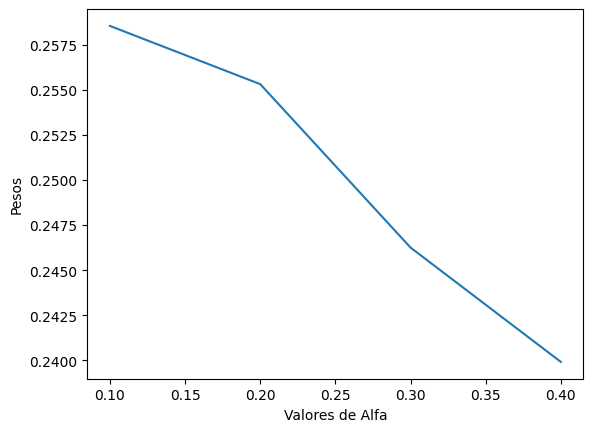

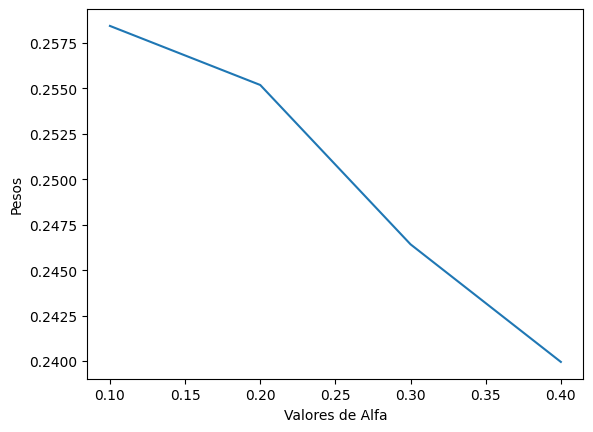

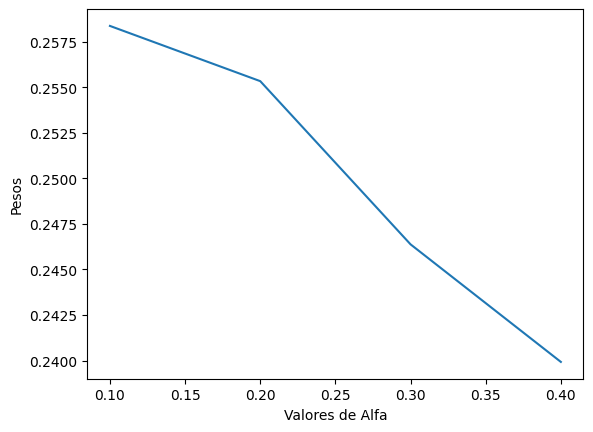

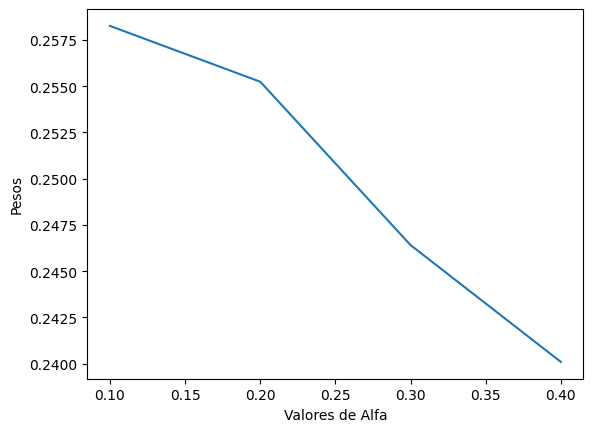

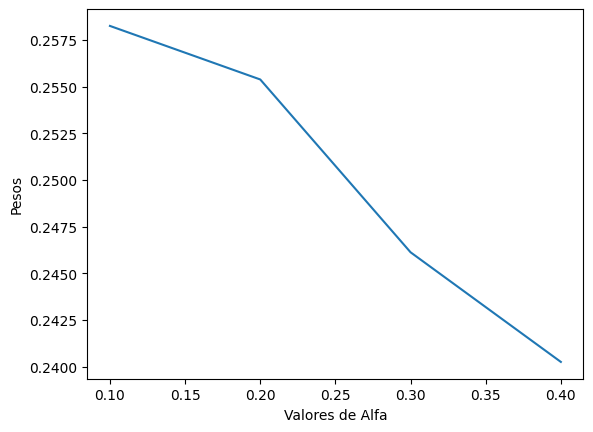

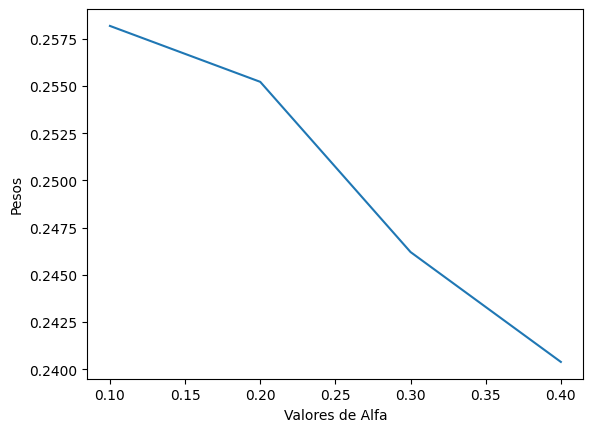

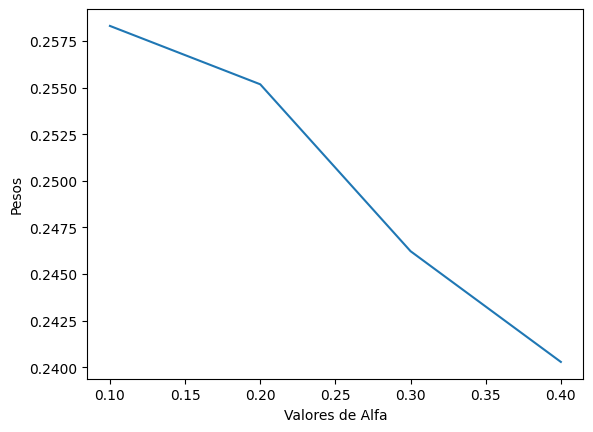

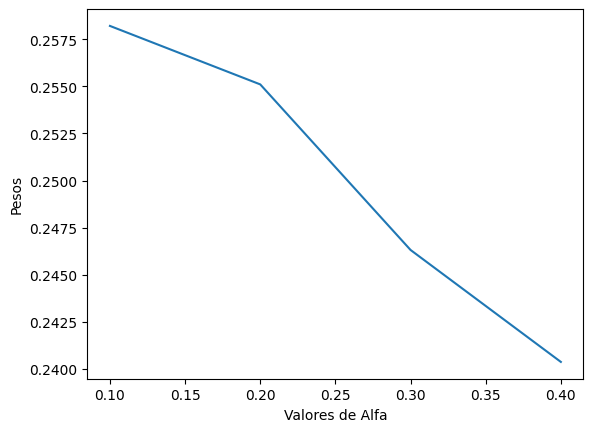

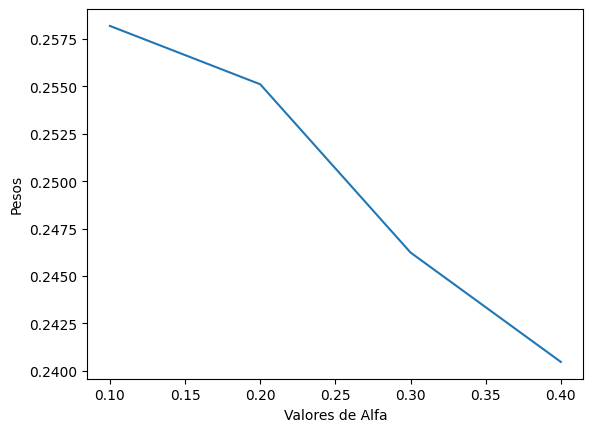

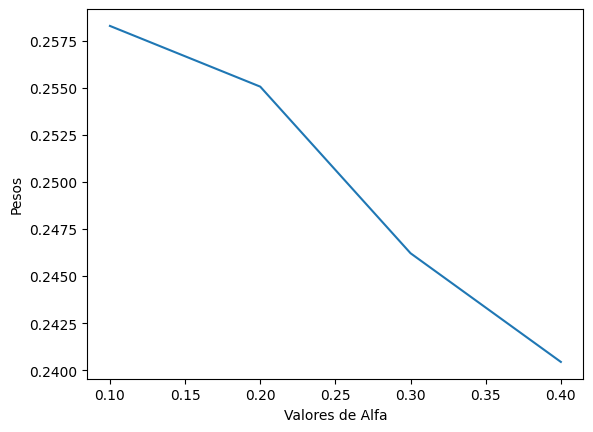

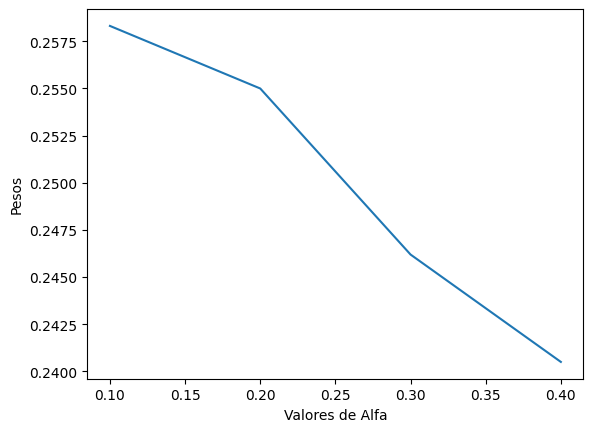

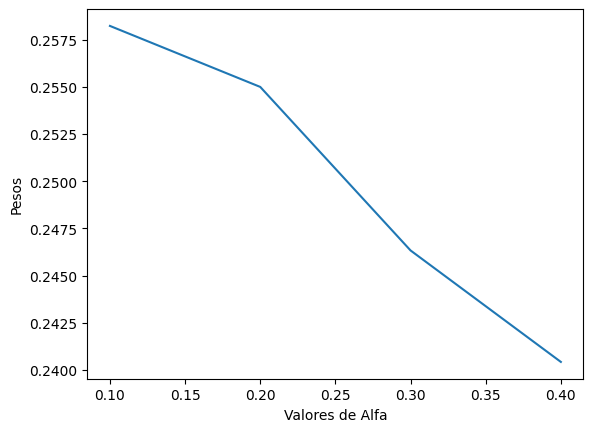

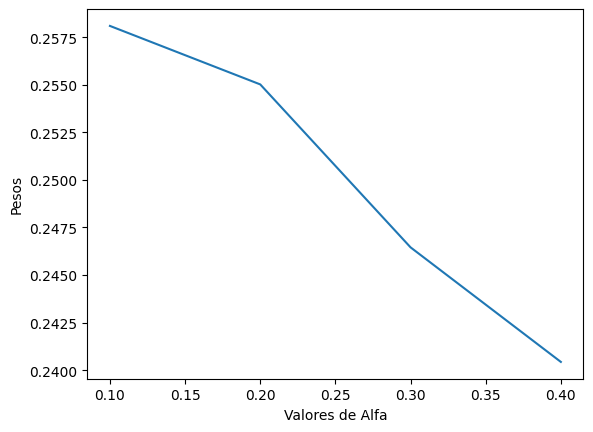

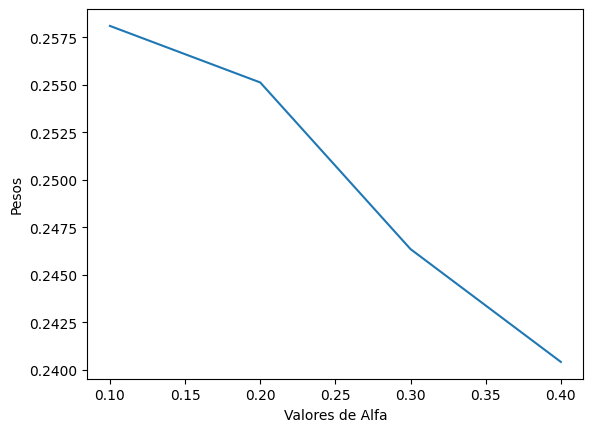

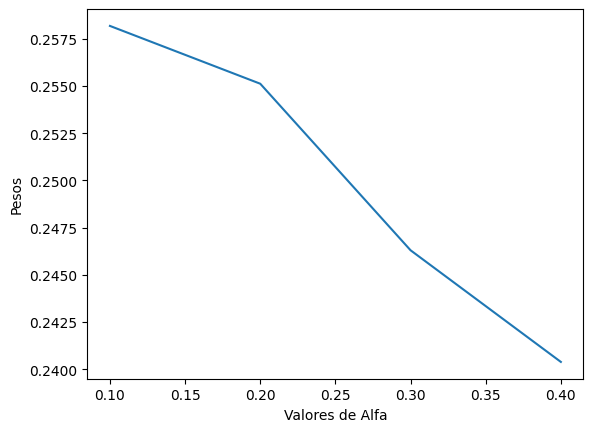

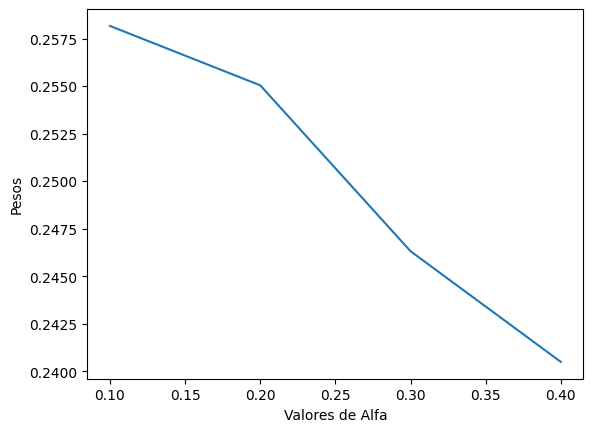

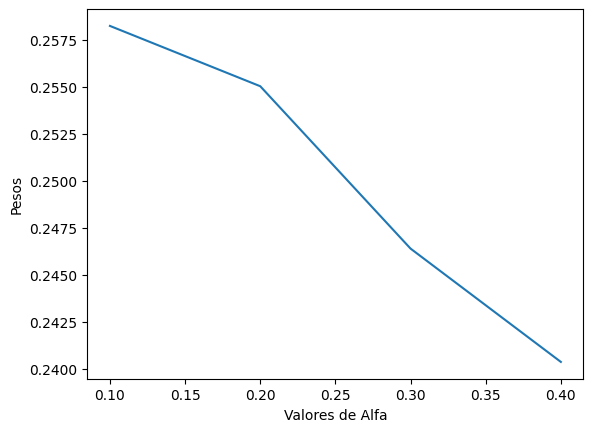

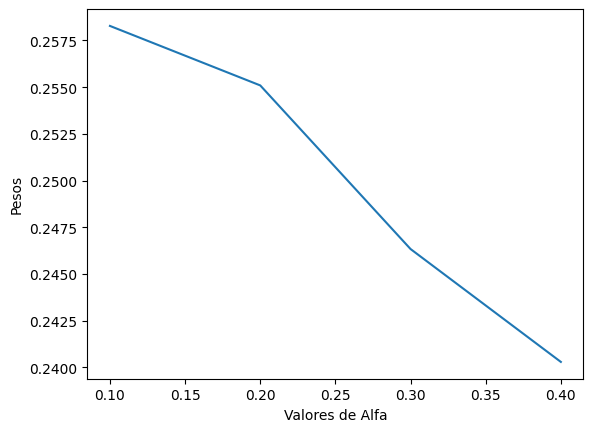

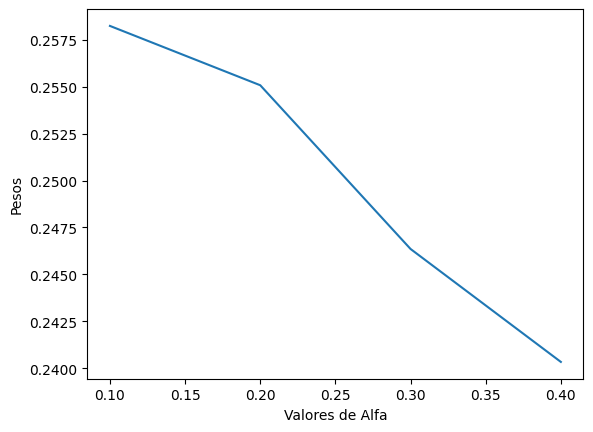

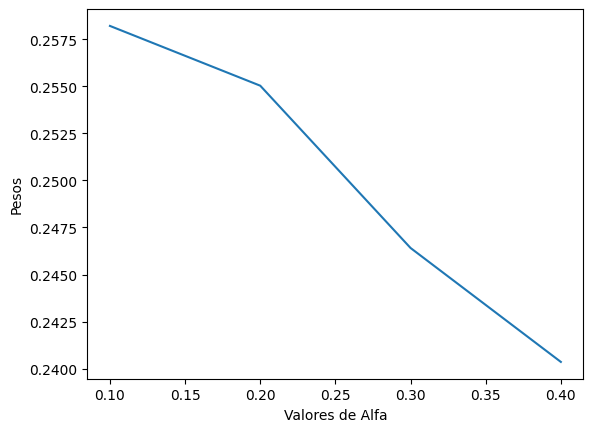

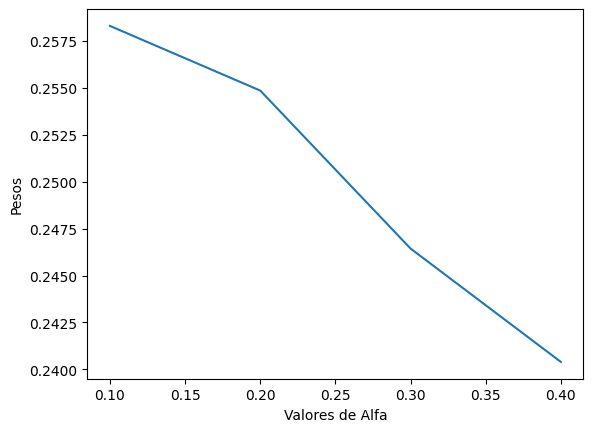

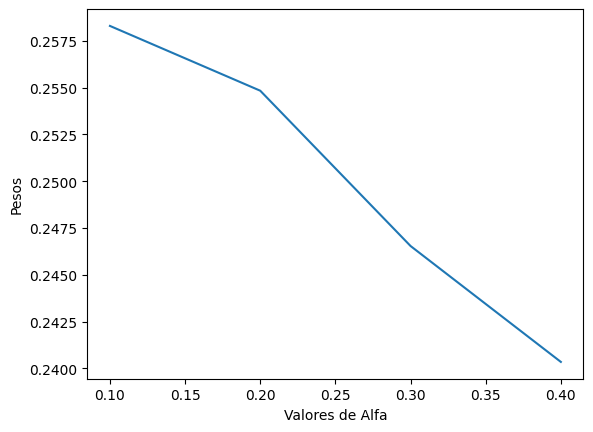

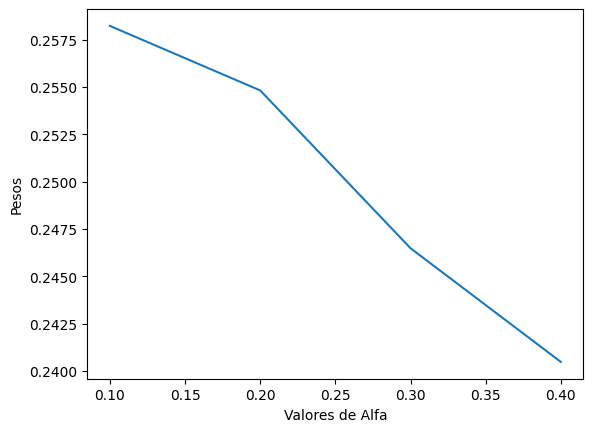

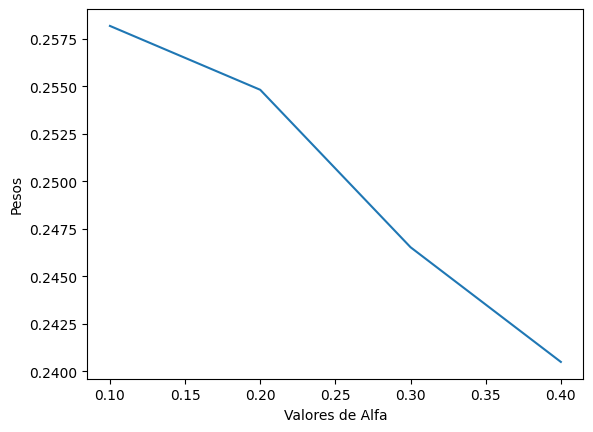

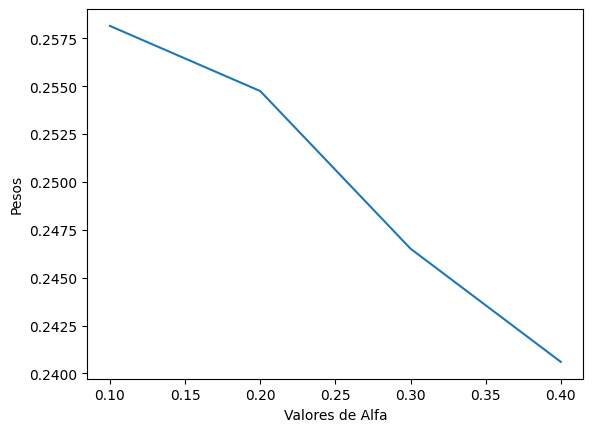

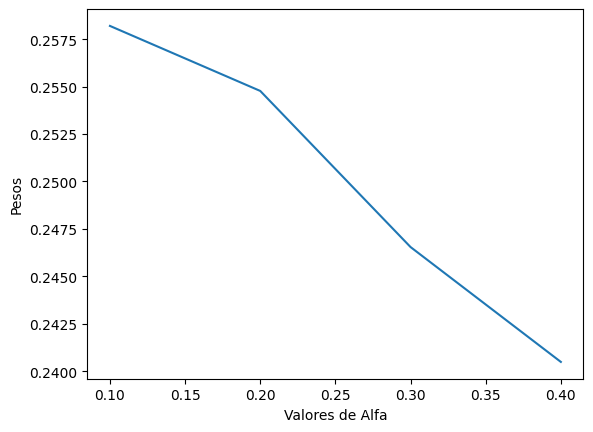

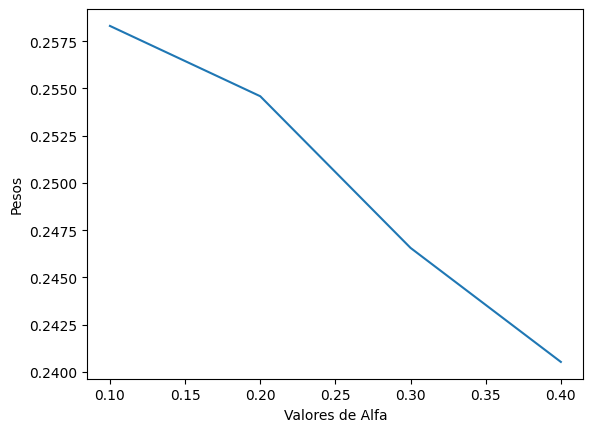

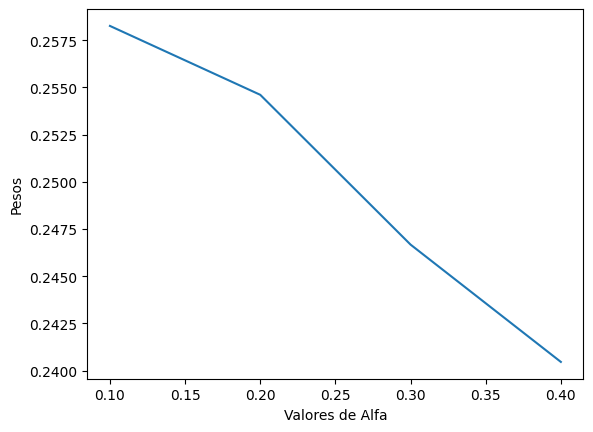

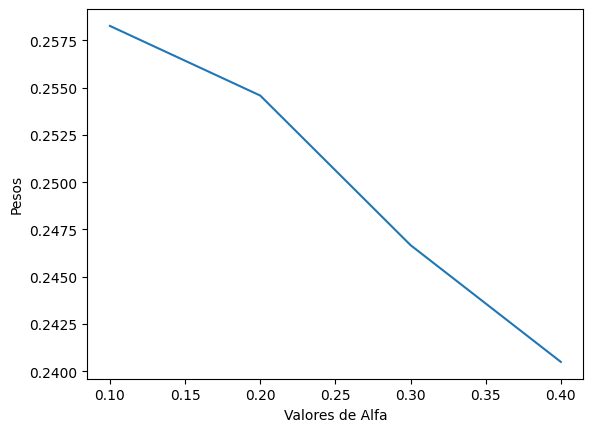

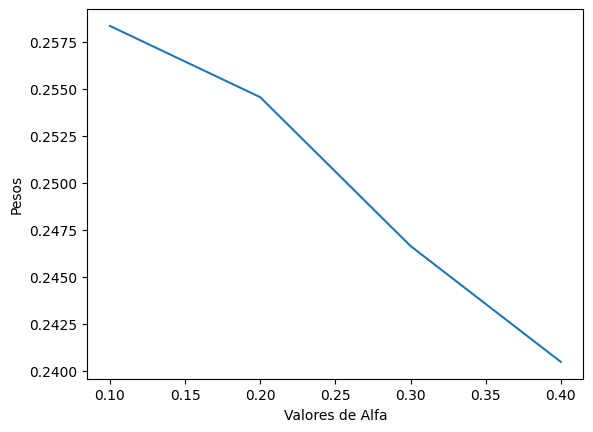

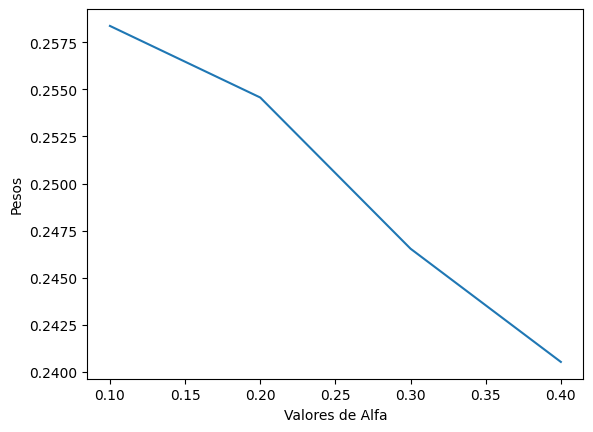

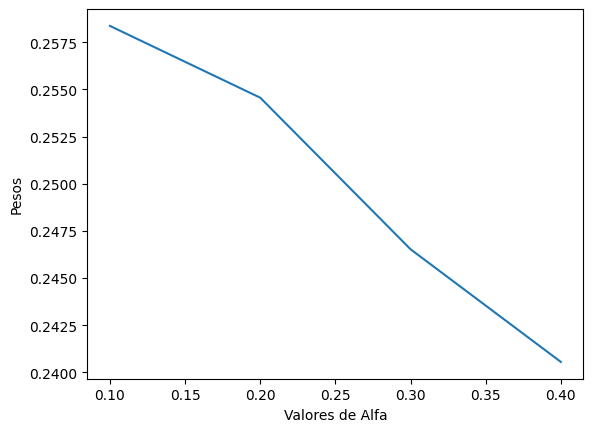

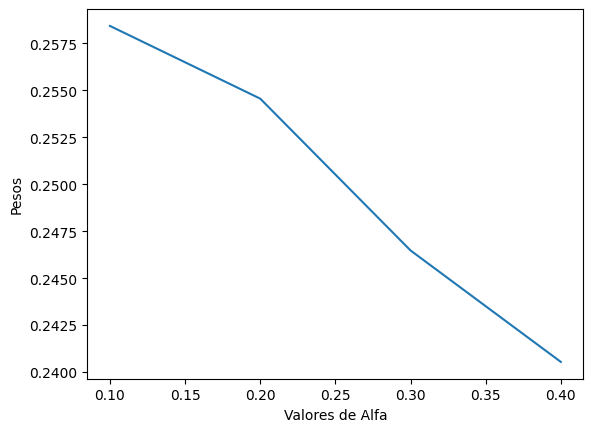

Finished in 39.6265 seconds
[0.2584830862992856, 0.25449719828842166, 0.2464650576855011, 0.24055465772679177]
count1
0


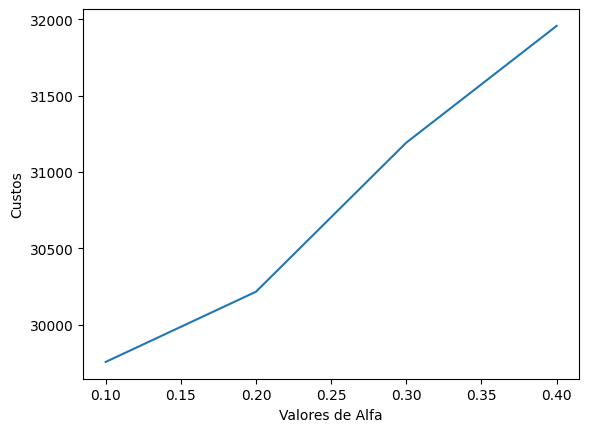

best_cost
23979.736824102387


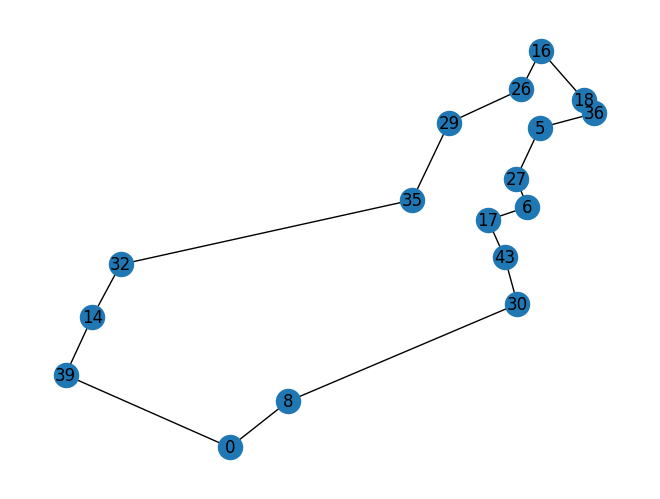

In [9]:
iterations = 10000
k_itr = 200
k = k_itr

best_cost = cost
best_route = route


alfa1 = []
alfa2 = []
alfa3 = []
alfa4 = []

grasp_solutions = []


alfas = [0.1, 0.2, 0.3, 0.4]
weights = [1, 1, 1, 1]

count1 = 0

tic = time.perf_counter()

for i in range(iterations):
    
    alfa_grasp = random.choices(alfas, weights=weights, k=1)[0]

 
    grasp_counter_start = time.perf_counter()
    route = gen.grasp_construction(G, quota, alfa_grasp)
    grasp_counter_end = time.perf_counter()
    
    if(route in grasp_solutions):
        count1+=1
        continue
    grasp_solutions.append(route)


    ls_counter_start = time.perf_counter()
    route = ls.drop_step(route, quota, G)

    route = ls.swap_2_opt(route, G, my_pos)
    ls_counter_end = time.perf_counter()

    cost = route_cost(route, G)

    if(alfa_grasp == alfas[0]):
        alfa1.append(cost)
    if(alfa_grasp == alfas[1]):
        alfa2.append(cost)
    if(alfa_grasp == alfas[2]):
        alfa3.append(cost)
    if(alfa_grasp == alfas[3]):
        alfa4.append(cost)


    # print(f"GRASP Finished in {grasp_counter_end - grasp_counter_start:0.4f} seconds")
    # print(f"LOCAL SEARCH Finished in {ls_counter_end - ls_counter_start:0.4f} seconds")

    if(cost < best_cost):
        best_route = route
        best_cost = cost
        alfa_best = alfa_grasp

    if(i == k):
        plt.plot(alfas, weights)

        plt.xlabel('Valores de Alfa')
        plt.ylabel('Pesos')
        plt.show()
        alfa1_av = sum(alfa1) / len(alfa1)
        alfa2_av = sum(alfa2) / len(alfa2)
        alfa3_av = sum(alfa3) / len(alfa3)
        alfa4_av = sum(alfa4) / len(alfa4)

        q1 = best_cost/alfa1_av
        q2 = best_cost/alfa2_av
        q3 = best_cost/alfa3_av
        q4 = best_cost/alfa4_av
        q_total = q1+q2+q3+q4
        weights = [q1/q_total, q2/q_total, q3/q_total, q4/q_total]
        k += k_itr 
        
    
    
toc = time.perf_counter()
print(f"Finished in {toc - tic:0.4f} seconds")

print(weights)
# print('alfa_best',alfa_best)

print('count1')
print(count1)

alfa1_av = sum(alfa1) / len(alfa1)
alfa2_av = sum(alfa2) / len(alfa2)
alfa3_av = sum(alfa3) / len(alfa3)
alfa4_av = sum(alfa4) / len(alfa4)

plt.plot(alfas,[alfa1_av, alfa2_av, alfa3_av, alfa4_av])

plt.xlabel('Valores de Alfa')
plt.ylabel('Custos')
plt.show()

plt.figure()
route_edges = [ (best_route[i-1]['id'],best_route[i]['id']) for i in range(len(best_route)) ]
nx.draw(G.edge_subgraph(route_edges), pos=my_pos, with_labels=True)

print('best_cost')
print(best_cost)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

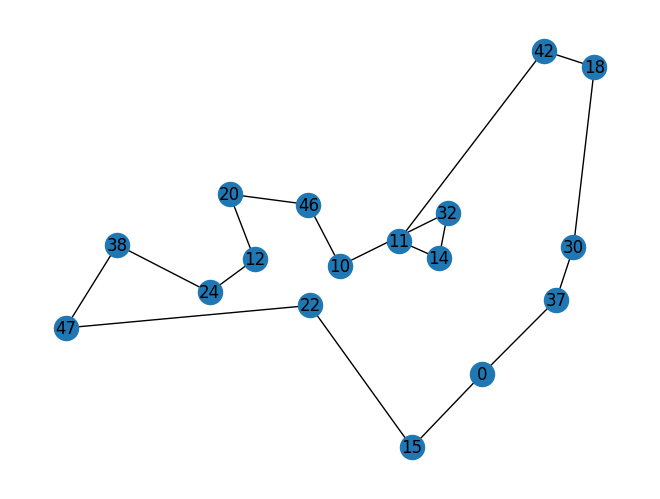

In [3]:



route = gen.genetic_algorithm(G, quota)

plt.figure()
route_edges = [ (route[i-1]['id'],route[i]['id']) for i in range(len(route)) ]


nx.draw(G.edge_subgraph(route_edges), pos=my_pos, with_labels=True)

In [ ]:
distance = calculate_route_distance(route, G)
cost = route_cost(route, G)
bonus = calculate_bonus_colected(route, G)
print('distance', distance)
print('cost', cost)
print('bonus', bonus)